In [1]:
# Dependencies 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as sts

In [2]:
renew_invest_df = pd.read_csv("Data/renewable-energy-investment.csv")
renew_invest_df

,Entity,Code,Year,Investment in Renewables by Region (IRENA (2016))
0,Americas (excl. US and Brazil),NaN,2004,1.73
1,Americas (excl. US and Brazil),NaN,2005,3.32
2,Americas (excl. US and Brazil),NaN,2006,3.71
3,Americas (excl. US and Brazil),NaN,2007,5.01
4,Americas (excl. US and Brazil),NaN,2008,6.05
...,...,...,...,...
91,United States of America,NaN,2011,49.06
92,United States of America,NaN,2012,40.65
93,United States of America,NaN,2013,35.33
94,United States of America,NaN,2014,37.05


In [3]:
total_renew_invest = renew_invest_df.groupby(["Year"]).sum()

In [4]:
total_renew_invest = pd.DataFrame(total_renew_invest)

In [5]:
total_renew_invest = total_renew_invest.rename(columns= {"Investment in Renewables by Region (IRENA (2016))":"Renewables_Investment"})

In [6]:
total_renew_invest

,Renewables_Investment
Year,
2004,46.60
2005,72.84
2006,112.03
2007,154.02
2008,182.19
2009,178.68
2010,239.19
2011,278.50
2012,257.28


In [7]:
global_warming_parameters = pd.read_csv("Data/All_parameters.csv")

In [8]:
global_warming_parameters

,Year,Gas Fuel,Liquid Fuel,Solid Fuel,Cement,Gas Flaring,population,GCAG_TEMP,GIS_TEMP,Sea_anomaly_temp,GMSL,CO2_Increase,CSIRO Adjusted Sea Level,Glacier_mass
0,1880,0.0,3.0,233.0,0.0,0.0,2.785161e+09,-0.1148,-0.20,-0.470009,-158.7,NaN,0.000000,NaN
1,1881,0.0,4.0,239.0,0.0,0.0,1.374792e+09,-0.0628,-0.12,-0.356879,-153.1,NaN,0.220472,NaN
2,1882,0.0,4.0,252.0,0.0,0.0,1.384401e+09,-0.0648,-0.10,-0.372661,-169.9,NaN,-0.440945,NaN
3,1883,0.0,3.0,269.0,0.0,0.0,1.394147e+09,-0.1424,-0.21,-0.448443,-164.6,NaN,-0.232283,NaN
4,1884,0.0,4.0,271.0,0.0,0.0,1.403721e+09,-0.2009,-0.28,-0.589754,-143.7,NaN,0.590551,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,2013,NaN,NaN,NaN,NaN,NaN,NaN,0.6679,0.65,0.584674,67.7,2.41,8.980315,-27.817
134,2014,NaN,NaN,NaN,NaN,NaN,NaN,0.7408,0.74,0.751255,NaN,2.04,NaN,-28.652
135,2015,NaN,NaN,NaN,NaN,NaN,NaN,0.8998,0.87,0.935577,NaN,2.94,NaN,NaN
136,2016,NaN,NaN,NaN,NaN,NaN,NaN,0.9363,0.99,NaN,NaN,2.86,NaN,NaN


In [9]:
energy_sources = pd.read_csv("Data/primary-energy-consumption-by-source.csv")
energy_sources

,Entity,Code,Year,Coal Consumption - EJ,Gas Consumption - EJ,Geo Biomass Other - TWh,Hydro Generation - TWh,Nuclear Generation - TWh,Solar Generation - TWh,Wind Generation -TWh,Oil Consumption - EJ
0,Africa,NaN,1965,1.164586,0.034358,0.000000,13.905635,0.000000,0.000000,0.000000,1.173241
1,Africa,NaN,1966,1.163240,0.038412,0.000000,15.510004,0.000000,0.000000,0.000000,1.284154
2,Africa,NaN,1967,1.189050,0.037964,0.000000,16.190636,0.000000,0.000000,0.000000,1.273799
3,Africa,NaN,1968,1.236646,0.038480,0.000000,18.938341,0.000000,0.000000,0.000000,1.344219
4,Africa,NaN,1969,1.247915,0.044971,0.000000,22.100890,0.000000,0.000000,0.000000,1.362729
...,...,...,...,...,...,...,...,...,...,...,...
5185,World,OWID_WRL,2015,157.838896,125.208334,538.277477,3884.619692,2575.763561,256.838045,831.567440,183.210968
5186,World,OWID_WRL,2016,155.504177,128.124027,547.865908,4012.947981,2614.905286,328.237428,963.774036,186.912413
5187,World,OWID_WRL,2017,156.094106,131.708206,582.893132,4065.869592,2638.554157,446.946764,1140.971268,189.242920
5188,World,OWID_WRL,2018,158.793935,138.659832,615.038237,4171.404951,2700.373917,582.754345,1270.164880,191.451896


In [10]:
total_energy_source= energy_sources.groupby(["Year"]).sum()
total_energy_source

,Coal Consumption - EJ,Gas Consumption - EJ,Geo Biomass Other - TWh,Hydro Generation - TWh,Nuclear Generation - TWh,Solar Generation - TWh,Wind Generation -TWh,Oil Consumption - EJ
Year,,,,,,,,
1965,174.313925,68.081028,53.955696,2769.593772,76.619173,0.000000,0.000000,195.573191
1966,176.300214,74.182981,59.418021,2951.451111,103.299871,0.000000,0.000000,210.561720
1967,173.456745,79.639625,59.959712,3017.227955,123.018042,0.000000,0.000000,225.618088
1968,176.052384,86.878780,66.360135,3177.867023,156.339492,0.000000,0.000000,244.894837
1969,181.426347,95.400915,69.773893,3365.229663,185.350235,0.000000,0.000000,265.430140
1970,184.232968,103.839751,77.079588,3523.942728,236.623971,0.000000,0.000000,288.446853
1971,183.232360,111.155681,83.637505,3681.195014,329.112532,0.000000,0.000000,304.612067
1972,185.266791,117.302678,89.631302,3853.891105,456.525447,0.000000,0.000000,328.081772
1973,190.812775,122.868575,96.254771,3909.028463,611.704738,0.000000,0.000000,353.658025


In [11]:
total_energy_source.reset_index(inplace=True)
total_energy_source

,Year,Coal Consumption - EJ,Gas Consumption - EJ,Geo Biomass Other - TWh,Hydro Generation - TWh,Nuclear Generation - TWh,Solar Generation - TWh,Wind Generation -TWh,Oil Consumption - EJ
0,1965,174.313925,68.081028,53.955696,2769.593772,76.619173,0.000000,0.000000,195.573191
1,1966,176.300214,74.182981,59.418021,2951.451111,103.299871,0.000000,0.000000,210.561720
2,1967,173.456745,79.639625,59.959712,3017.227955,123.018042,0.000000,0.000000,225.618088
3,1968,176.052384,86.878780,66.360135,3177.867023,156.339492,0.000000,0.000000,244.894837
4,1969,181.426347,95.400915,69.773893,3365.229663,185.350235,0.000000,0.000000,265.430140
5,1970,184.232968,103.839751,77.079588,3523.942728,236.623971,0.000000,0.000000,288.446853
6,1971,183.232360,111.155681,83.637505,3681.195014,329.112532,0.000000,0.000000,304.612067
7,1972,185.266791,117.302678,89.631302,3853.891105,456.525447,0.000000,0.000000,328.081772
8,1973,190.812775,122.868575,96.254771,3909.028463,611.704738,0.000000,0.000000,353.658025
9,1974,190.966153,125.887474,101.876441,4293.794952,799.800280,0.000000,0.000000,348.542101


In [12]:
#create function for linear regressions
def linregress_func(x,y):
    r = sts.pearsonr(x,y)
    #perform linear regression
    slope, intercept, rvalue, pvalue, stderr= linregress(x,y) 
   
    #set equation needed to get regression values using y = mx +b
    regress_values = x*slope + intercept

    #get equation of a line for printing on graph
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    #plot scatter chart
    plt.scatter(x,y)
    
    #plot regression values on the same chart
    plt.plot(x,regress_values, "-r",label = line_eq)
    #add equation of line describing data set
    plt.legend(loc = 'best')

    #print line equation and r-squared value
    print(f"The r-squared is {round((r[0])**2,2)}.")
    print(f"The equation of the regression line is {line_eq}.")

The r-squared is 0.98.
The equation of the regression line is y = 6.09x + -11906.44.


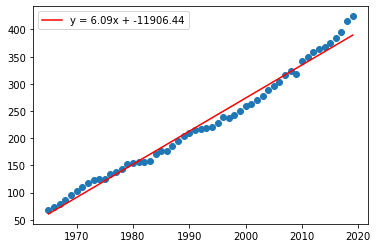

In [13]:
#gas linear regression
x_gas = total_energy_source["Year"]
y_gas = total_energy_source["Gas Consumption - EJ"]
linregress_func(x_gas,y_gas)

The r-squared is 0.94.
The equation of the regression line is y = 5.82x + -11164.03.


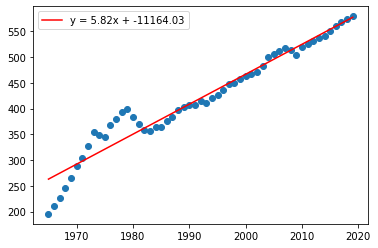

In [14]:
#oil linear regression
x_oil = total_energy_source["Year"]
y_oil = total_energy_source["Oil Consumption - EJ"]
linregress_func(x_oil,y_oil)

The r-squared is 0.92.
The equation of the regression line is y = 6.3x + -12240.81.


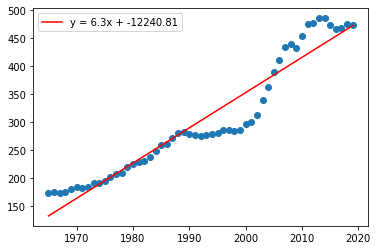

In [15]:
#gas linear regression
x_coal = total_energy_source["Year"]
y_coal = total_energy_source["Coal Consumption - EJ"]
linregress_func(x_coal,y_coal)

The r-squared is 0.94.
The equation of the regression line is y = 5.82x + -11164.03.


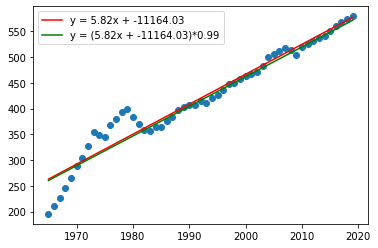

In [16]:
#oil analysis

r = sts.pearsonr(x_oil,y_oil)
#perform linear regression
slope, intercept, rvalue, pvalue, stderr= linregress(x_oil,y_oil) 
   
#set equation needed to get regression values using y = mx +b
regress_values = x_oil*slope + intercept
#plotting line with 1% lower oil consumption
regress_values_1percent = (x_oil*slope + intercept)*0.99

#get equation of a line for printing on graph
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
line_eq_1percent = "y = (" + str(round(slope,2)) + "x + " + str(round(intercept,2)) + ")*0.99"

#plot scatter chart
plt.scatter(x_oil,y_oil)
    
#plot regression values on the same chart
plt.plot(x_oil,regress_values, "-r",label = line_eq)
plt.plot(x_oil,regress_values_1percent, "-g",label = line_eq_1percent)
#add equation of line describing data set
plt.legend(loc = 'best')

#print line equation and r-squared value
print(f"The r-squared is {round((r[0])**2,2)}.")
print(f"The equation of the regression line is {line_eq}.")

In [17]:
#results of oil analyses
oil_no_change_2050 = 5.82*(2050) + -11164.03
oil_1per_change_2050 = (5.82*(2050) + -11164.03)*.99
print(f"Oil consumption if no changes: {round(oil_no_change_2050,2)} TWh")
print(f"Oil consumption if 1% reduction: {round(oil_1per_change_2050,2)} TWh")

Oil consumption if no changes: 766.97 TWh
Oil consumption if 1% reduction: 759.3 TWh


In [22]:
year_test = [2030,2040,2050,2100,2200]
oil_results_no_change = []
oil_results_1per = []
for year in year_test:
    no_change = 5.82*year + -11164.03
    oil_results_no_change.append(round(no_change,2))
    One_per_change = (5.82*year + -11164.03)*0.99
    oil_results_1per.append(round(One_per_change,2))
print(oil_results_no_change)
print(oil_results_1per)

[650.57, 708.77, 766.97, 1057.97, 1639.97]
[644.06, 701.68, 759.3, 1047.39, 1623.57]


The r-squared is 0.98.
The equation of the regression line is y = 6.09x + -11906.44.


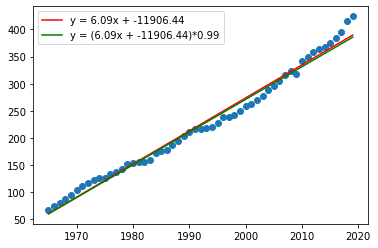

In [23]:
#gas analysis

r = sts.pearsonr(x_gas,y_gas)
#perform linear regression
slope, intercept, rvalue, pvalue, stderr= linregress(x_gas,y_gas) 
   
#set equation needed to get regression values using y = mx +b
regress_values = x_gas*slope + intercept
#plotting line with 1% lower oil consumption
regress_values_1percent = (x_gas*slope + intercept)*0.99

#get equation of a line for printing on graph
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
line_eq_1percent = "y = (" + str(round(slope,2)) + "x + " + str(round(intercept,2)) + ")*0.99"

#plot scatter chart
plt.scatter(x_gas,y_gas)
    
#plot regression values on the same chart
plt.plot(x_gas,regress_values, "-r",label = line_eq)
plt.plot(x_gas,regress_values_1percent, "-g",label = line_eq_1percent)
#add equation of line describing data set
plt.legend(loc = 'best')

#print line equation and r-squared value
print(f"The r-squared is {round((r[0])**2,2)}.")
print(f"The equation of the regression line is {line_eq}.")

In [24]:
#results of gas analyses
gas_no_change_2050 = 6.09*(2050) + -11906.44
gas_1per_change_2050 = (6.09*(2050) + -11906.44)*.99
print(f"Gas consumption if no changes: {round(gas_no_change_2050,2)} TWh")
print(f"Gas consumption if 1% reduction: {round(gas_1per_change_2050,2)} TWh")

Gas consumption if no changes: 578.06 TWh
Gas consumption if 1% reduction: 572.28 TWh


In [26]:
year_test = [2030,2040,2050,2100,2200]
gas_results_no_change = []
gas_results_1per = []
for year in year_test:
    no_change = 6.09*year + -11906.44
    gas_results_no_change.append(round(no_change,2))
    One_per_change = (6.09*year + -11906.44)*0.99
    gas_results_1per.append(round(One_per_change,2))
print(gas_results_no_change)
print(gas_results_1per)

[456.26, 517.16, 578.06, 882.56, 1491.56]
[451.7, 511.99, 572.28, 873.73, 1476.64]
